In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

# Read the CSV files
d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

# Merging the DataFrames
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
d3 = pd.merge(d1, d2, on=merge_columns)

# number of rows in the merged DataFrame
print(f"Number of students: {len(d3)}")
d3.head()


Number of students: 382


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
print(d3.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')


we have 4 groups and want to check weather any one of group has higher mean (hyopthesis). Hence we are going to perfrom annova test.(Annalysis of variences)

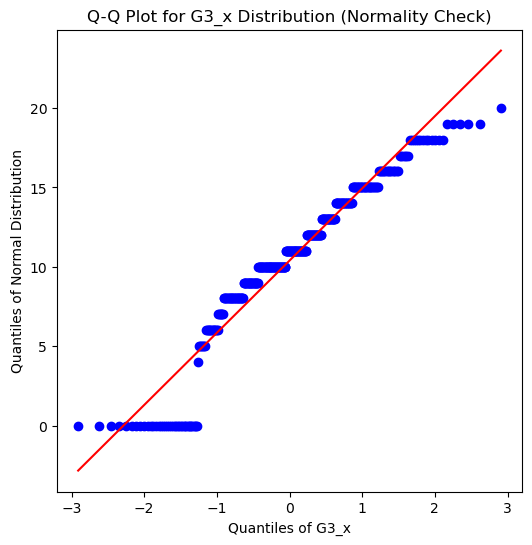

Shapiro-Wilk Test Statistic: 0.9285411834716797
p-value: 1.5190666649914086e-12


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming d3 is your dataframe containing G3_x

# Retrieve all G3_x data
all_grades = d3['G3_x']

# Q-Q plot for normality check (consider using Shapiro-Wilk for a statistical test)
plt.figure(figsize=(6, 6))
stats.probplot(all_grades, dist="norm", plot=plt.gca())
plt.xlabel("Quantiles of G3_x")
plt.ylabel("Quantiles of Normal Distribution")
plt.title("Q-Q Plot for G3_x Distribution (Normality Check)")
plt.show()

# Shapiro-Wilk test
shapiro_wilk_test = stats.shapiro(all_grades)
print(f"Shapiro-Wilk Test Statistic: {shapiro_wilk_test.statistic}")
print(f"p-value: {shapiro_wilk_test.pvalue}")

The data is normally distributed. Assuming the four categories G3_x values also normally distributed.

In [5]:
# Levene's test for homogeneity of variances
stat, p = stats.levene(
    study_groups['Less than 2 hours'].dropna(),
    study_groups['2 to 5 hours'].dropna(),
    study_groups['5 to 10 hours'].dropna(),
    study_groups['More than 10 hours'].dropna()
)
print(f'Levene’s test: Statistics={stat:.3f}, p={p:.3f}')


Levene’s test: Statistics=0.990, p=0.397


As p is greater than 0.05, we can reject null hypothesis with respect to levene's test saying( Null hypothesis: There is significant difference between the variences of group). Hence there are no significant changes in the vairences. By checking the conditions of the annova test. we are good to go with annova test..


In [6]:
from scipy.stats import f_oneway


f_stat, p_value = f_oneway(
    study_groups['Less than 2 hours'].dropna(),
    study_groups['2 to 5 hours'].dropna(),
    study_groups['5 to 10 hours'].dropna(),
    study_groups['More than 10 hours'].dropna()
)

print(f'ANOVA F-statistic={f_stat:.3f}, p-value={p_value:.3f}')


ANOVA F-statistic=1.599, p-value=0.189


Hypothesis Definition
Null Hypothesis (H0): The mean final math grades (G3_x) are the same across all study time groups. This means that the amount of time students spend studying outside of school each week does not have a significant impact on their final math grades.

Alternative Hypothesis (H1): There is at least one study time group whose mean final math grade (G3_x) is significantly different from the others. This implies that the amount of time spent studying outside of school each week does affect students' final math grades.


The results from the one-way ANOVA test (F-statistic=1.599, p-value=0.189) indicate that, at a typical alpha level of 0.05, we w fail to reject the null hypothesis. The p-value of 0.189 suggests that there is not a statistically significant difference in the mean final grades (G3_x) among the different study time groups for the math subject.

Interpretation
This means that, based on the analyzed data, the amount of time students report spending on study outside of school does not have a statistically significant impact on their final math grades. It's important to remember that this hypothesis result does not imply that study time has no effect on student performance; rather, it simply suggests that any differences that do exist among these particular groups are not statistically significant within the context of this dataset and analysis.

 lets check with the portugese subject

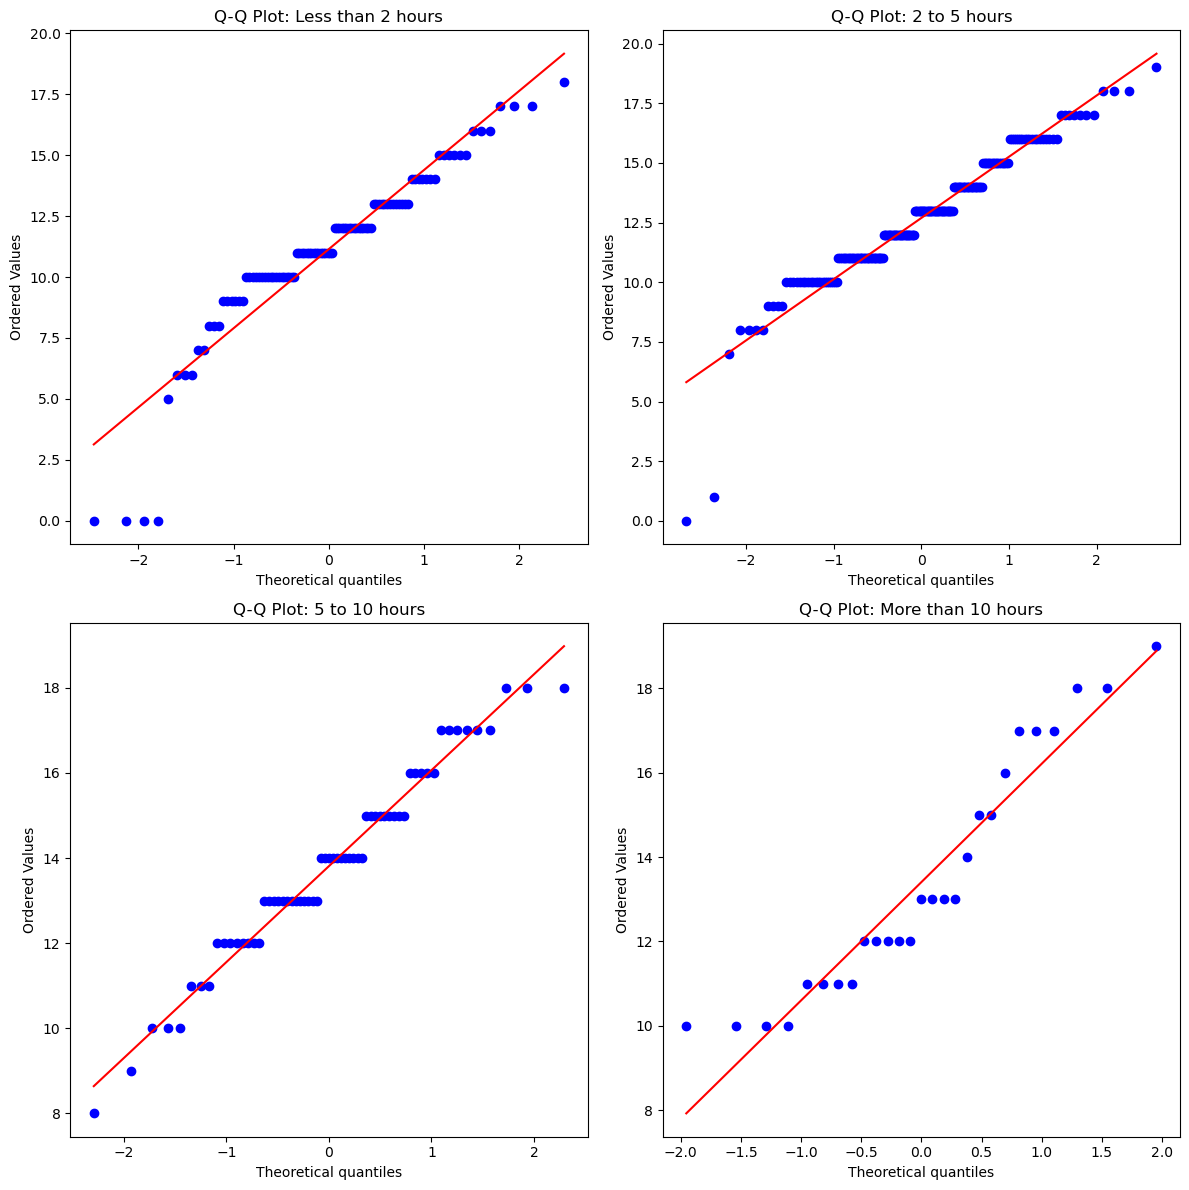

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# Categorize the data based on studytime_y
study_groups_y = {
    'Less than 2 hours': d3[d3['studytime_y'] == 1]['G3_y'],
    '2 to 5 hours': d3[d3['studytime_y'] == 2]['G3_y'],
    '5 to 10 hours': d3[d3['studytime_y'] == 3]['G3_y'],
    'More than 10 hours': d3[d3['studytime_y'] == 4]['G3_y']
}

# Generate Q-Q plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the array for easy iteration
for i, (group_name, grades) in enumerate(study_groups_y.items()):
    stats.probplot(grades, dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q Plot: {group_name}')
plt.tight_layout()
plt.show()


In [8]:
from scipy.stats import levene

# Extract grades for easier reference
grades_less_2_hours = study_groups_y['Less than 2 hours'].dropna()
grades_2_to_5_hours = study_groups_y['2 to 5 hours'].dropna()
grades_5_to_10_hours = study_groups_y['5 to 10 hours'].dropna()
grades_more_10_hours = study_groups_y['More than 10 hours'].dropna()

# Perform Levene's test
stat, p = levene(
    grades_less_2_hours,
    grades_2_to_5_hours,
    grades_5_to_10_hours,
    grades_more_10_hours
)

print(f'Levene’s test: Statistics={stat:.3f}, p={p:.3f}')


Levene’s test: Statistics=1.513, p=0.211


In [9]:
from scipy.stats import f_oneway

# Performing one-way ANOVA
f_stat, p_value = f_oneway(
    grades_less_2_hours,
    grades_2_to_5_hours,
    grades_5_to_10_hours,
    grades_more_10_hours
)

print(f'ANOVA F-statistic={f_stat:.3f}, p-value={p_value:.3f}')


ANOVA F-statistic=13.697, p-value=0.000


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Prepare the data
# You need to create a combined array of all grades and a corresponding array of group labels
all_grades = np.concatenate([
    grades_less_2_hours,
    grades_2_to_5_hours,
    grades_5_to_10_hours,
    grades_more_10_hours
])

group_labels = (['Less than 2 hours'] * len(grades_less_2_hours) +
                ['2 to 5 hours'] * len(grades_2_to_5_hours) +
                ['5 to 10 hours'] * len(grades_5_to_10_hours) +
                ['More than 10 hours'] * len(grades_more_10_hours))

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_grades, groups=group_labels, alpha=0.05)

# Print the results
print(tukey_results)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2       meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------
     2 to 5 hours      5 to 10 hours   1.1148 0.0334  0.0612  2.1684   True
     2 to 5 hours  Less than 2 hours  -1.5477 0.0001 -2.4372 -0.6581   True
     2 to 5 hours More than 10 hours   0.7127 0.6057 -0.7778  2.2032  False
    5 to 10 hours  Less than 2 hours  -2.6625    0.0 -3.8237 -1.5012   True
    5 to 10 hours More than 10 hours  -0.4021 0.9248 -2.0691  1.2649  False
Less than 2 hours More than 10 hours   2.2603 0.0013  0.6919  3.8288   True
---------------------------------------------------------------------------


The results from Tukey's HSD test provide detailed comparisons between all pairs of study time groups regarding their final grades in Portuguese. Let's interpret the significant findings:

Significant Differences
2 to 5 hours vs. 5 to 10 hours:

Mean Difference: 1.1148
p-value: 0.0334
Reject: True
Interpretation: Students studying between 5 to 10 hours a week have significantly higher final grades compared to those studying 2 to 5 hours, with an average difference of about 1.11 grade points.
2 to 5 hours vs. Less than 2 hours:

Mean Difference: -1.5477
p-value: 0.0001
Reject: True
Interpretation: Students studying 2 to 5 hours a week have significantly higher final grades compared to those studying less than 2 hours, with an average difference of about 1.55 grade points.
5 to 10 hours vs. Less than 2 hours:

Mean Difference: -2.6625
p-value: 0.0
Reject: True
Interpretation: Students studying 5 to 10 hours a week have significantly higher final grades compared to those studying less than 2 hours, with an average difference of about 2.66 grade points.
Less than 2 hours vs. More than 10 hours:

Mean Difference: 2.2603
p-value: 0.0013
Reject: True
Interpretation: Students studying more than 10 hours a week have significantly higher final grades compared to those studying less than 2 hours, with an average difference of about 2.26 grade points.
Non-Significant Differences
2 to 5 hours vs. More than 10 hours
5 to 10 hours vs. More than 10 hours
These comparisons did not show statistically significant differences in mean final grades, as indicated by the "reject" being False.

Overall Interpretation
The Tukey HSD results indicate clear patterns in how study time impacts final grades in Portuguese:

Increasing study time generally correlates with better performance, especially when moving from less than 2 hours to more significant amounts of study time.
The most substantial improvements in grades seem to occur when students move from studying very little (<2 hours) to more moderate or high levels of study (5-10 hours or more).
There is not a significant difference in performance between students studying 2 to 5 hours and those studying more than 10 hours, nor between those studying 5 to 10 hours and more than 10 hours. This could suggest diminishing returns on grades beyond a certain amount of study time.
These findings can inform educational strategies, highlighting the importance of encouraging students to dedicate a reasonable amount of time to studying while also considering other factors that contribute to academic success.






